In [1]:
#__________________________ Applied Statistics 2024/2025 _________________________

#### 1.1. Linear Models with homoscedastic* and independent errors: ARMD Trial ####
#_________________________________________________________________________________#
# * homoscedastic = homogeneous variance

# Topic: Linear Models with homoscedastic and independent errors (theory: Chapter 4)
# in R: Chapter 5 + Chapters 2.2 & 3.2 for ARMD Trial dataset + Chapter 6

# Summary:
# 1.1.1 Age-Related Macular Degeneration (ARMD) Trial: the Dataset (Chapter 2.2)
# 1.1.2 ARMD Trial: Data Visualization (Chapter 3.2)
# 1.1.3 ARMD Trial: Linear Model with Homogeneous Variance (Chapter 6) 
#                   [LM with independent, homoscedastic residual errors]

# SET THE DIRECTORY FIRST!

In [2]:
#________________________________________________________________________________________#
##### 1.1.1 Age-Related Macular Degeneration (ARMD) Trial: the Dataset (Chapter 2.2) #####
#________________________________________________________________________________________#

# A multi-center clinical trial comparing 
# an experimental treatment (interferon-alpha) and placebo in patients diagnosed with ARMD. 

# Patients with ARMD progressively lose vision. 
# Visual acuity of each of 240 patients participating in the trial was measured at baseline 
# and at (up to) 4 post-randomization timepoints (i.e., at 4, 12, 24, and 52 weeks). 

# Resulting data are an example of longitudinal data with observations grouped by subjects.

# Visual acuity was evaluated based on patient's ability to read lines of letters 
# on standardized vision charts. 
# The charts display lines of five letters of decreasing size, which the patient
# must read from top (largest letters) to bottom (smallest letters). 
# We will focus on the visual acuity defined as the total number of letters correctly read.

In [3]:
rm(list=ls())         # Clear all objects from the workspace
library(settings)     # Load the 'settings' package
reset(options)        # Reset all global options to their default values
graphics.off()        # Close all open graphics devices

library(nlmeU)  # --> for the dataset
library(nlme)   # --> for models implementation
library(lattice)
library(corrplot)
library(plot.matrix)


Attaching package: 'nlmeU'


The following object is masked from 'package:stats':

    sigma


corrplot 0.95 loaded



In [4]:
data(armd.wide)        # Load the built-in dataset 'armd.wide' in wide format
head(armd.wide)        # Display the first few rows of 'armd.wide' to get a quick look at the data
#help(armd.wide)        # Open documentation for 'armd.wide' for more details on the dataset
dim(armd.wide)         # Get the dimensions of 'armd.wide' (number of rows and columns)
str(armd.wide)         # Display the structure of 'armd.wide', showing data types of each column 

,subject,lesion,line0,visual0,visual4,visual12,visual24,visual52,treat.f,miss.pat
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,1,3,12,59,55,45,NA,NA,Active,--XX
2,2,1,13,65,70,65,65,55,Active,----
3,3,4,8,40,40,37,17,NA,Placebo,---X
4,4,2,13,67,64,64,64,68,Placebo,----
5,5,1,14,70,NA,NA,NA,NA,Active,XXXX
6,6,3,12,59,53,52,53,42,Active,----


[1] 240  10

'data.frame':	240 obs. of  10 variables:
 $ subject : Factor w/ 240 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ lesion  : int  3 1 4 2 1 3 1 3 2 1 ...
 $ line0   : int  12 13 8 13 14 12 13 8 12 10 ...
 $ visual0 : int  59 65 40 67 70 59 64 39 59 49 ...
 $ visual4 : int  55 70 40 64 NA 53 68 37 58 51 ...
 $ visual12: int  45 65 37 64 NA 52 74 43 49 71 ...
 $ visual24: int  NA 65 17 64 NA 53 72 37 54 71 ...
 $ visual52: int  NA 55 NA 68 NA 42 65 37 58 NA ...
 $ treat.f : Factor w/ 2 levels "Placebo","Active": 2 2 1 1 2 2 1 1 2 1 ...
 $ miss.pat: Factor w/ 9 levels "----","---X",..: 4 1 2 1 9 1 1 1 1 2 ...


In [5]:
data(armd0)    #transfromed!!!  # --> long (or longitudinal) format
head(armd0)     # new features: time.f, time, tp, and visual
#help(armd0)
dim(armd0)
str(armd0)

,subject,treat.f,visual0,miss.pat,time.f,time,visual,tp
,<fct>,<fct>,<int>,<fct>,<ord>,<dbl>,<int>,<dbl>
1,1,Active,59,--XX,Baseline,0,59,0
2,1,Active,59,--XX,4wks,4,55,1
3,1,Active,59,--XX,12wks,12,45,2
4,2,Active,65,----,Baseline,0,65,0
5,2,Active,65,----,4wks,4,70,1
6,2,Active,65,----,12wks,12,65,2


[1] 1107    8

'data.frame':	1107 obs. of  8 variables:
 $ subject : Factor w/ 240 levels "1","2","3","4",..: 1 1 1 2 2 2 2 2 3 3 ...
 $ treat.f : Factor w/ 2 levels "Placebo","Active": 2 2 2 2 2 2 2 2 1 1 ...
 $ visual0 : int  59 59 59 65 65 65 65 65 40 40 ...
 $ miss.pat: Factor w/ 9 levels "----","---X",..: 4 4 4 1 1 1 1 1 2 2 ...
 $ time.f  : Ord.factor w/ 5 levels "Baseline"<"4wks"<..: 1 2 3 1 2 3 4 5 1 2 ...
 $ time    : num  0 4 12 0 4 12 24 52 0 4 ...
 $ visual  : int  59 55 45 65 70 65 65 55 40 40 ...
 $ tp      : num  0 1 2 0 1 2 3 4 0 1 ...


In [6]:
data(armd)      # --> long (or longitudinal) format (subset of armd0, without baseline)
head(armd)
#help(armd)
dim(armd)
str(armd)

,subject,treat.f,visual0,miss.pat,time.f,time,visual,tp
,<fct>,<fct>,<int>,<fct>,<ord>,<dbl>,<int>,<dbl>
2,1,Active,59,--XX,4wks,4,55,1
3,1,Active,59,--XX,12wks,12,45,2
5,2,Active,65,----,4wks,4,70,1
6,2,Active,65,----,12wks,12,65,2
7,2,Active,65,----,24wks,24,65,3
8,2,Active,65,----,52wks,52,55,4


[1] 867   8

'data.frame':	867 obs. of  8 variables:
 $ subject : Factor w/ 234 levels "1","2","3","4",..: 1 1 2 2 2 2 3 3 3 4 ...
 $ treat.f : Factor w/ 2 levels "Placebo","Active": 2 2 2 2 2 2 1 1 1 1 ...
 $ visual0 : int  59 59 65 65 65 65 40 40 40 67 ...
 $ miss.pat: Factor w/ 8 levels "----","---X",..: 4 4 1 1 1 1 2 2 2 1 ...
 $ time.f  : Ord.factor w/ 4 levels "4wks"<"12wks"<..: 1 2 1 2 3 4 1 2 3 1 ...
  ..- attr(*, "contrasts")= num [1:4, 1:3] -0.5222 -0.3023 0.0275 0.797 0.565 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:4] "4wks" "12wks" "24wks" "52wks"
  .. .. ..$ : chr [1:3] ".L" ".Q" ".C"
 $ time    : num  4 12 4 12 24 52 4 12 24 4 ...
 $ visual  : int  55 45 70 65 65 55 40 37 17 64 ...
 $ tp      : num  1 2 1 2 3 4 1 2 3 1 ...


In [7]:
# armd was built from armd0 as follows:
auxDt <- subset(armd0, time > 0)        # Create a new dataset 'auxDt' by selecting rows where 'time' is greater than 0 (post-baseline data)

dim(auxDt)                             # Get the dimensions (number of rows and columns) of 'auxDt'

levels(auxDt$time.f)                   # Show the levels of the factor variable 'time.f' in the dataset 'auxDt'
armd <- droplevels(auxDt)               # Drop unused levels of the factor variables in 'auxDt' (cleanup to reduce unnecessary categories)
levels(armd$time.f)                    # Show the levels of the 'time.f' factor after unused levels were dropped

armd <- within(armd, {                  # Modify the 'armd' dataset by applying transformations to it
  contrasts(time.f) <- contr.poly(4, scores = c(4, 12, 24, 52))  # Assign polynomial contrasts to the factor 'time.f' with specific scores at 4, 12, 24, and 52
  # Additional explanation can be found in '1.5.1 in 1_5_Supplementary.R'
})

[1] 867   8

[1] "Baseline" "4wks"     "12wks"    "24wks"    "52wks"

[1] "4wks"  "12wks" "24wks" "52wks"

In [8]:
#____________________________________________________________#
##### 1.1.2 ARMD Trial: Data Visualization (Chapter 3.2) #####
#____________________________________________________________#
# We are mainly interested in the effect of treatment on the visual acuity measurements.
# We plot measurements against time for several selected patients from both treatment groups. 

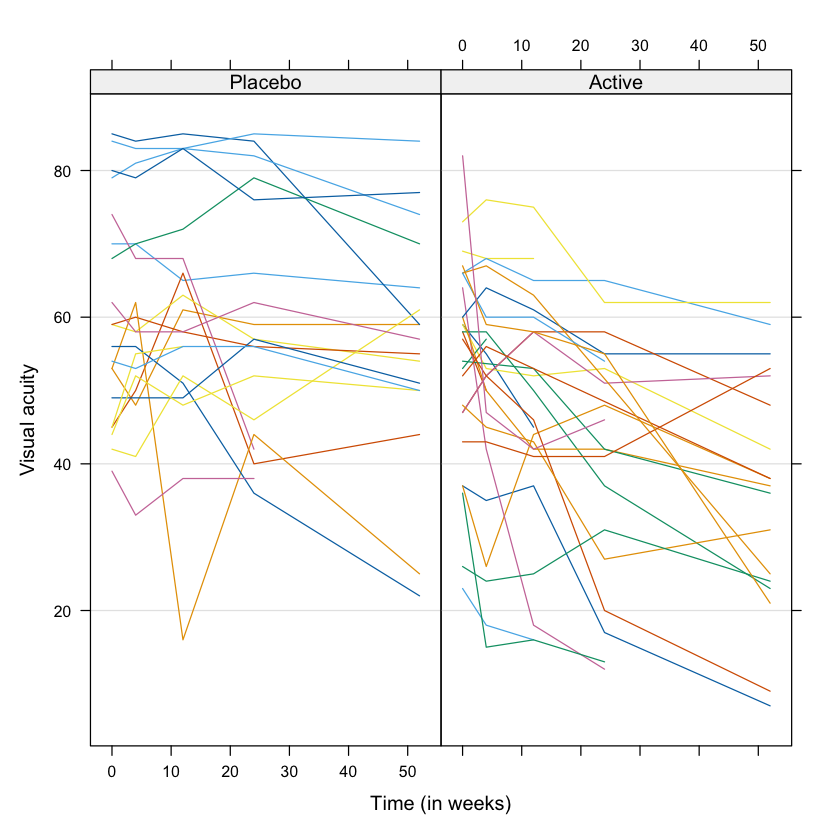

In [9]:
# Visual-acuity profiles for selected patients --> we visualize some of the trends
armd0.subset <- subset(armd0, as.numeric(subject) %in% seq(1, 240, 5)) # 1 every 5 patients

xy1 <- xyplot(visual ~ time | treat.f,   
            # visual and time are plotted against each other in separate
            # panels for different values of 'treat.f' factor.
            groups = subject,
            data = armd0.subset,
            type = "l", lty = 1)

update(xy1, xlab = "Time (in weeks)",
      ylab = "Visual acuity",
      grid = "h")

# Comments:
# - Decreasing trend in time, on average (patients progressively lose vision)
#   but patients have very different trends;
# - "Active" patients have on average lower values of the response;
# - There are patients for whom several measurements are missing;
# - Measurements adjacent in time seem to be well correlated, with the
#   correlation decreasing with an increasing distance in time;
# - Visual acuity at baseline seems to (partially) determine the overall level
#   of the post-randomization measurements.

In [43]:
# Inspecting missing-data patterns

# The factor miss.pat that indicates which of the four
# post-randomization measurements are missing for a particular patient
table(armd.wide$miss.pat)

# Comments:
# 188 patients for whom all four post-randomization visual acuity measurements were obtained.
# 6 patients for whom the four measurements were missing.
# 8 (= 4+1+2+1) patients with intermittent missing visual acuity measurements. 


---- ---X --X- --XX -XX- -XXX X--- X-XX XXXX 
 188   24    4    8    1    6    2    1    6 

In [11]:
# When modeling data with such patterns, extra care is needed 
# when specifying variance–covariance structures.

In [44]:
# Mean-Value profiles

# we compute the sample means 
# of visual acuity measurements for different visits and treatment groups (excluding na values)

# sample means across time and treatment
flst <- list(armd0$time.f, armd0$treat.f)    # "By" factors

(tN <-  tapply(armd0$visual, flst, FUN = function(x) length(x[!is.na(x)])))  # Counts

# NB: the function tapply() applies a selected function to each (nonempty) group of values 
# defined by a unique combination of the levels of one (or more) factors.

tMn <- tapply(armd0$visual, flst, FUN = mean)     # Sample means
tMd <- tapply(armd0$visual, flst, FUN = median)   # Sample medians

colnames(res  <- cbind(tN, tMn, tMd))             # Combine the results into a single matrix


nms1 <- rep(c("P", "A"), 3)
nms2 <- rep(c("n", "Mean", "Median"), rep(2, 3))

colnames(res) <- paste(nms1, nms2, sep = ":")     # Column names
res

# Comments:
# - on average, little difference in visual acuity between the two treatment groups at baseline. 
#   This is expected in a randomized study. 
# - During the course of the study, the mean visual acuity decreased with time 
#   in both settings (A and P)
# - Mean value is consistently higher in the placebo group, 
#   which suggests lack of effect of interferon-alpha.

,Placebo,Active
Baseline,119,121
4wks,117,114
12wks,117,110
24wks,112,102
52wks,105,90


[1] "Placebo" "Active"  "Placebo" "Active"  "Placebo" "Active"

,P:n,A:n,P:Mean,A:Mean,P:Median,A:Median
Baseline,119,121,55.33613,54.57851,56.0,57.0
4wks,117,114,53.96581,50.91228,54.0,52.0
12wks,117,110,52.87179,48.67273,53.0,49.5
24wks,112,102,49.33036,45.46078,50.5,45.0
52wks,105,90,44.43810,39.10000,44.0,37.0


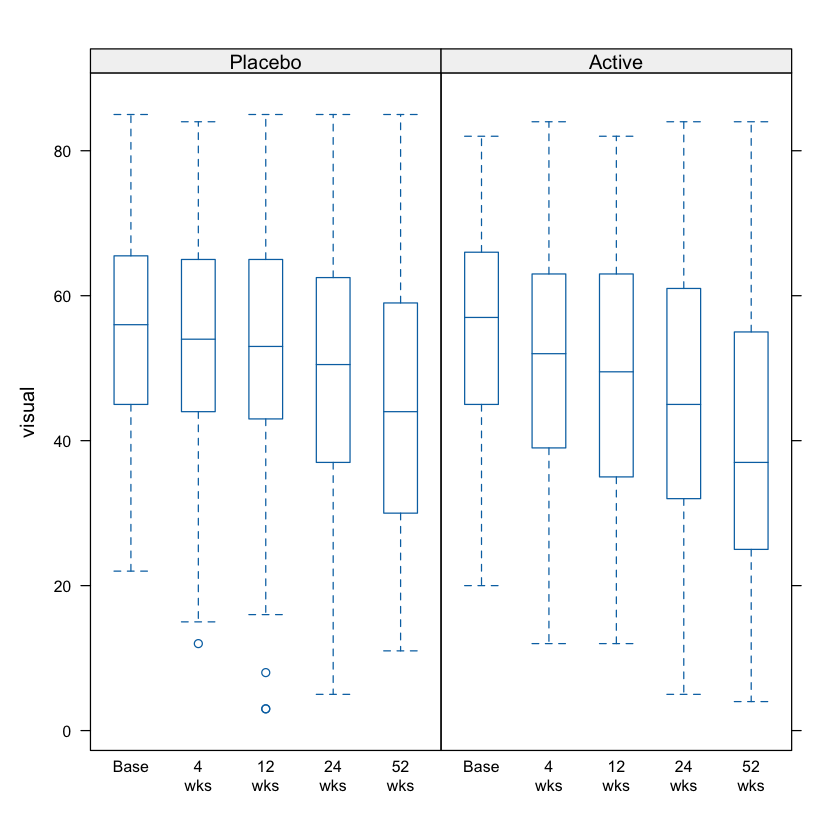

In [14]:
# Box-plots for visual acuity for the five timepoints and the two treatments

bw1 <- bwplot(visual ~ time.f | treat.f, data = armd0)  # bwplot from package lattice
xlims <- c("Base", "4\nwks", "12\nwks", "24\nwks", "52\nwks")
update(bw1, xlim = xlims, pch = "|" )

# Comments:
# - The decrease of the mean values in time is clearly seen for both treatment groups;
# - It is more pronounced for the active treatment arm;
# - As there was a slightly higher dropout in that arm, a possible
#   explanation could be that patients whose visual acuity improved dropped out of the study.

In [47]:
head(armd.wide)

,subject,lesion,line0,visual0,visual4,visual12,visual24,visual52,treat.f,miss.pat
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,1,3,12,59,55,45,NA,NA,Active,--XX
2,2,1,13,65,70,65,65,55,Active,----
3,3,4,8,40,40,37,17,NA,Placebo,---X
4,4,2,13,67,64,64,64,68,Placebo,----
5,5,1,14,70,NA,NA,NA,NA,Active,XXXX
6,6,3,12,59,53,52,53,42,Active,----


,visual0,visual4,visual12,visual24,visual52
visual0,220.3055,206.7096,196.2439,193.3099,152.7141
visual4,206.7096,246.2204,224.7933,221.2677,179.2284
visual12,196.2439,224.7933,286.2072,257.7738,222.6830
visual24,193.3099,221.2677,257.7738,334.4456,285.2327
visual52,152.7141,179.2284,222.6830,285.2327,347.4311


visual0  visual4 visual12 visual24 visual52 
220.3055 246.2204 286.2072 334.4456 347.4311

         visual0 visual4 visual12 visual24 visual52
visual0     1.00    0.89     0.78     0.71     0.55
visual4     0.89    1.00     0.85     0.77     0.61
visual12    0.78    0.85     1.00     0.83     0.71
visual24    0.71    0.77     0.83     1.00     0.84
visual52    0.55    0.61     0.71     0.84     1.00


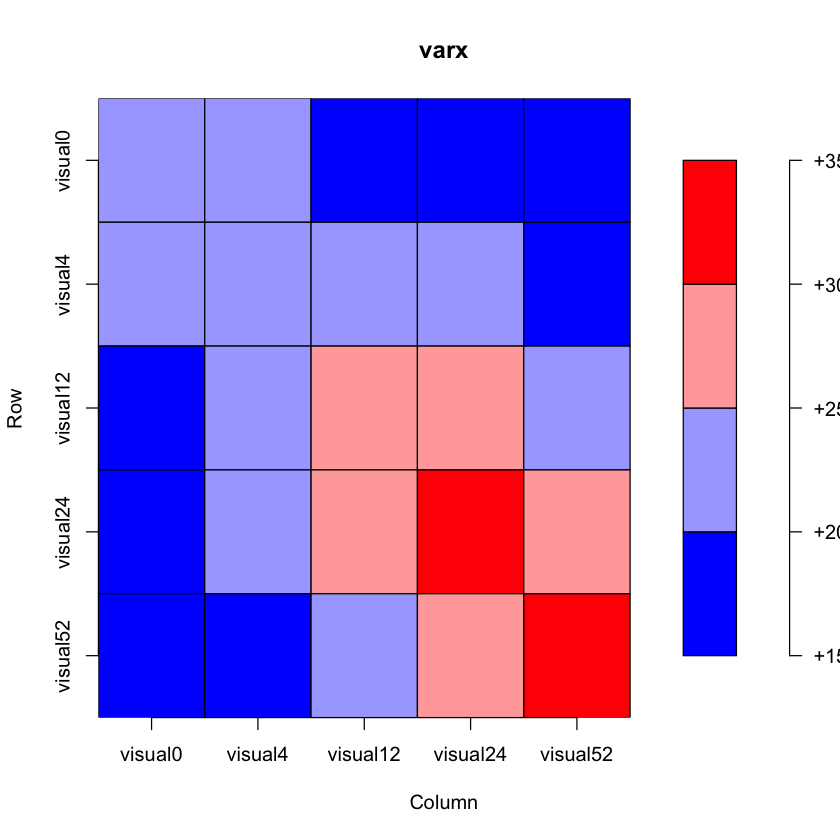

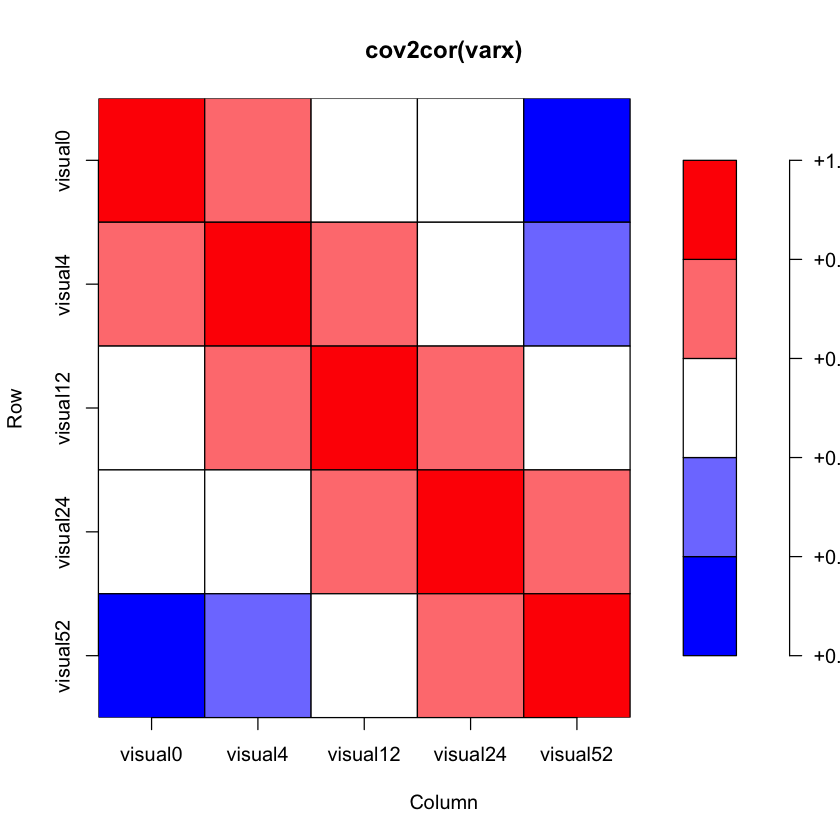

In [ ]:
# Variance–covariance and correlation matrices for visual acuity

# measurements for complete cases only (n = 188)
visual.x <- subset(armd.wide, select = c(visual0:visual52))
(varx <- var(visual.x, use = "complete.obs"))            # Var-cov matrix

par(bg = "white")
plot(varx, col=colorRampPalette(c("blue", "white", "red")))
# increase of the variance of visual acuity measurements obtained at later timepoints.
diag(varx)                                               # Var-cov diagonal elements

print(cor(visual.x, use = "complete.obs"), digits = 2)   # Corr matrix
#cov2cor(varx)  # Corr matrix (alternative way) 

par(bg = "white")
plot(cov2cor(varx), col=colorRampPalette(c("blue", "white", "red")))
# moderate-strong correlation which clearly decreases with the time gap

In [ ]:
#______________________________________________________________________________#
##### 1.1.3 ARMD Trial: Linear Model with Homogeneous Variance (Chapter 6) #####
#______________________________________________________________________________#

In [53]:
data(armd, package = "nlmeU")
head(armd)

,subject,treat.f,visual0,miss.pat,time.f,time,visual,tp
,<fct>,<fct>,<int>,<fct>,<ord>,<dbl>,<int>,<dbl>
2,1,Active,59,--XX,4wks,4,55,1
3,1,Active,59,--XX,12wks,12,45,2
5,2,Active,65,----,4wks,4,70,1
6,2,Active,65,----,12wks,12,65,2
7,2,Active,65,----,24wks,24,65,3
8,2,Active,65,----,52wks,52,55,4


In [17]:
# NB: from now on, b stands for beta

# MODEL FORMULATION:
# VISUAL_it = b_0t + b_1 * VISUAL0_i + b_2t * TREAT_i + eps_it
# with eps_it~N(0,sigma^2)

# Comments:
# - VISUAL_it is the value of visual acuity measured for patient i (i = 1, . . . ,234) 
#     at time t (t = 1,2,3,4, corresponding to values of 4, 12, 24, and 52weeks, respectively);
# - b_0t is the timepoint-specific intercept;
# - b_1 is the baseline visual acuity effect;
# - VISUAL0_i is the baseline value of visual acuity;
# - b_2t is the timepoint-specific treatment effect.
# - TREAT_i is the treatment indicator (equal 1 for the active group and 0 otherwise);

# The model assumes a time-dependent treatment effect, 
# with the time variable being treated as a factor.

# MODEL FORMULATION in R:

lm1.form <- formula(visual ~ -1 + visual0 + time.f + treat.f:time.f ) 
# see 1_2_Formulation_Recap.R

# NB: To obtain timepoint-specific intercepts at 4,12,24 and 52 weeks, 
#    the overall intercept is removed from the model by specifying the -1 term.

# For further details related to design matrix and the contrasts for the (unordered) factors, 
# see 1.5.2 in 1_5_Supplementary_Materials.R
lm1.form

visual ~ -1 + visual0 + time.f + treat.f:time.f

In [18]:
# we now fit the linear model
lm6.1 <- lm(lm1.form, data = armd)         # through lm()
lm6.1


Call:
lm(formula = lm1.form, data = armd)

Coefficients:
                  visual0                 time.f4wks  
                   0.8304                     8.0753  
              time.f12wks                time.f24wks  
                   7.0807                     3.6302  
              time.f52wks   time.f4wks:treat.fActive  
                  -1.7464                    -2.3528  
time.f12wks:treat.fActive  time.f24wks:treat.fActive  
                  -3.7085                    -3.4492  
time.f52wks:treat.fActive  
                  -4.4735  


In [19]:
summ <- summary(lm6.1)                     # Summary
summ

# NB: estimated coefficients for the time.f:treat.f interaction indicate
# a negative effect of the “Active” treatment.


Call:
lm(formula = lm1.form, data = armd)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.210  -6.459   1.532   7.512  33.283 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
visual0                    0.83037    0.02842  29.213  < 2e-16 ***
time.f4wks                 8.07531    1.94341   4.155 3.58e-05 ***
time.f12wks                7.08066    1.94066   3.649  0.00028 ***
time.f24wks                3.63022    1.95316   1.859  0.06342 .  
time.f52wks               -1.74643    1.98952  -0.878  0.38029    
time.f4wks:treat.fActive  -2.35278    1.62894  -1.444  0.14900    
time.f12wks:treat.fActive -3.70852    1.64378  -2.256  0.02432 *  
time.f24wks:treat.fActive -3.44915    1.69399  -2.036  0.04205 *  
time.f52wks:treat.fActive -4.47345    1.77811  -2.516  0.01206 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.38 on 858 degrees of freedom
Multiple R-squared:  0.9432,	Adjusted R-squared:  0.9

In [54]:
# How to obtain information from our lm
lm6.1$coefficients       # the betas
#lm6.1$residuals          # ^epsilon
#lm6.1$fitted.values      # ^y
lm6.1$rank               # rank
lm6.1$df.residual        # degrees of freedom of the model (n-rank)
#lm6.1$model              # the dataframe
#rstandard(lm6.1)         # the standardized residuals
summ$sigma               # sigma (estimate of the residual standard deviation)

visual0                time.f4wks               time.f12wks 
                0.8303725                 8.0753138                 7.0806575 
              time.f24wks               time.f52wks  time.f4wks:treat.fActive 
                3.6302160                -1.7464298                -2.3527761 
time.f12wks:treat.fActive time.f24wks:treat.fActive time.f52wks:treat.fActive 
               -3.7085220                -3.4491532                -4.4734534

[1] 9

[1] 858

[1] 12.37649

In [55]:
vcov(lm6.1)              # variance-covariance matrix
sqrt(diag(vcov(lm6.1)))  # standard errors of the coefficients

,visual0,time.f4wks,time.f12wks,time.f24wks,time.f52wks,time.f4wks:treat.fActive,time.f12wks:treat.fActive,time.f24wks:treat.fActive,time.f52wks:treat.fActive
visual0,0.0008079402,-0.04465078,-0.04455410,-0.04446556,-0.04493686,0.0006818244,0.0004772936,0.0004090621,0.0008412837
time.f4wks,-0.0446507781,3.77683349,2.46228051,2.45738746,2.48343375,-1.3468911494,-0.0263776119,-0.0226068015,-0.0464935086
time.f12wks,-0.0445541015,2.46228051,3.76615940,2.45206680,2.47805669,-0.0375994127,-1.3355306508,-0.0225578539,-0.0463928422
time.f24wks,-0.0444655634,2.45738746,2.45206680,3.81485108,2.47313229,-0.0375246950,-0.0262681957,-1.3901700595,-0.0463006502
time.f52wks,-0.0449368619,2.48343375,2.47805669,2.47313229,3.95817963,-0.0379224259,-0.0265466170,-0.0227516465,-1.5056255672
time.f4wks:treat.fActive,0.0006818244,-1.34689115,-0.03759941,-0.03752470,-0.03792243,2.6534485953,0.0004027903,0.0003452094,0.0007099632
time.f12wks:treat.fActive,0.0004772936,-0.02637761,-1.33553065,-0.02626820,-0.02654662,0.0004027903,2.7020156380,0.0002416550,0.0004969915
time.f24wks:treat.fActive,0.0004090621,-0.02260680,-0.02255785,-1.39017006,-0.02275165,0.0003452094,0.0002416550,2.8696051972,0.0004259441
time.f52wks:treat.fActive,0.0008412837,-0.04649351,-0.04639284,-0.04630065,-1.50562557,0.0007099632,0.0004969915,0.0004259441,3.1616833676


visual0                time.f4wks               time.f12wks 
               0.02842429                1.94340770                1.94065953 
              time.f24wks               time.f52wks  time.f4wks:treat.fActive 
               1.95316438                1.98951744                1.62894094 
time.f12wks:treat.fActive time.f24wks:treat.fActive time.f52wks:treat.fActive 
               1.64378090                1.69399091                1.77811230

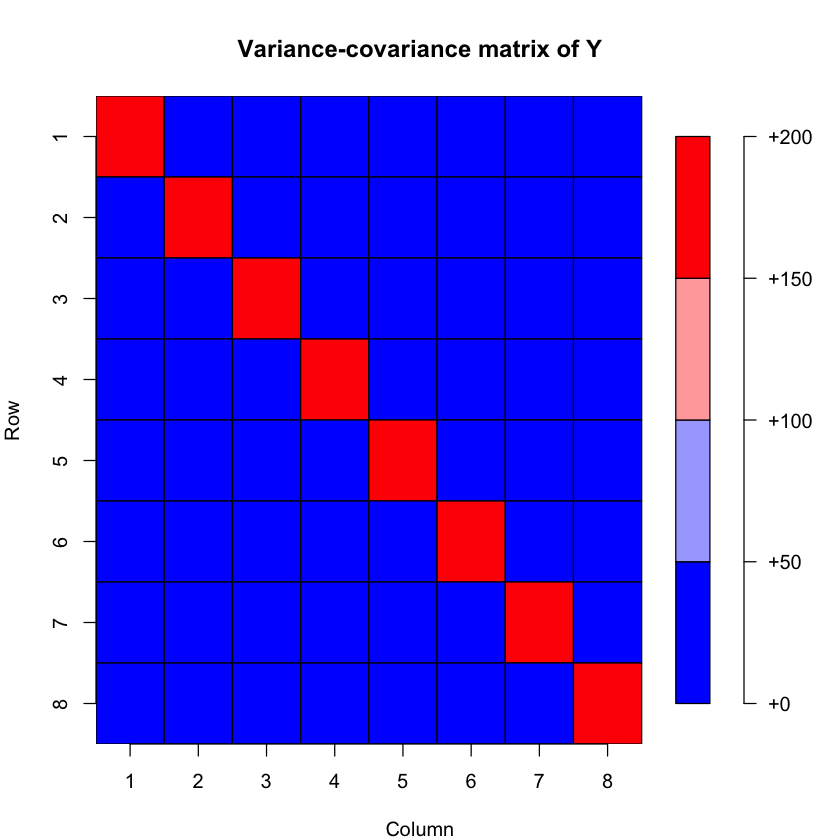

In [21]:
# Plot of the variance-covariance matrix of Y (first 8 observations) 
# --> it is a diagonal matrix with a value of 12.38^2
par(bg = "white")
par(mar = c(4,4,4,4))
plot(diag(x=12.38^2, nrow=8, ncol=8), 
      col=colorRampPalette(c("blue", "white", "red")), 
      main='Variance-covariance matrix of Y')

In [22]:
# Confidence intervals for the coefficients
alpha = 0.05
confint(lm6.1,level = 1 - alpha)

# We can correct them through Bonferroni
confint(lm6.1,level = 1 - alpha/length(lm6.1$coefficients))

,2.5 %,97.5 %
visual0,0.7745832,0.8861617
time.f4wks,4.2609239,11.8897036
time.f12wks,3.2716615,10.8896534
time.f24wks,-0.2033236,7.4637556
time.f52wks,-5.6513208,2.1584611
time.f4wks:treat.fActive,-5.5499518,0.8443996
time.f12wks:treat.fActive,-6.9348245,-0.4822195
time.f24wks:treat.fActive,-6.7740045,-0.1243018
time.f52wks:treat.fActive,-7.9634126,-0.9834943


,0.278 %,99.722 %
visual0,0.7513541,0.9093908
time.f4wks,2.6727214,13.4779062
time.f12wks,1.6857049,12.4756101
time.f24wks,-1.7994995,9.0599315
time.f52wks,-7.2772054,3.7843457
time.f4wks:treat.fActive,-6.8811640,2.1756118
time.f12wks:treat.fActive,-8.2781644,0.8611204
time.f24wks:treat.fActive,-8.1583773,1.2600709
time.f52wks:treat.fActive,-9.4165315,0.4696246


In [23]:
# We now try to use our model to fit new observations 
# and generate confidence and prediction intervals

# Step 1: we generate new observations - 3 patients (within the range of the observed values)
X.new <- data.frame(time.f = ordered(rep(c('4wks', '12wks', '24wks', '52wks' ),3)),
                visual0 = c(rep(50,4), rep(60,4), rep(55,4)),
                treat.f = factor(c(rep('Active',4), rep('Placebo',4), rep('Active',4)))
)
X.new

time.f,visual0,treat.f
<ord>,<dbl>,<fct>
4wks,50,Active
12wks,50,Active
24wks,50,Active
52wks,50,Active
4wks,60,Placebo
12wks,60,Placebo
24wks,60,Placebo
52wks,60,Placebo
4wks,55,Active


In [24]:
# Step 2: we build the intervals (for each single observation)
IC <-predict(lm6.1, X.new, interval="confidence", level=0.95)
IC 

IP <-predict(lm6.1, X.new, interval="prediction", level=0.95)
IP 
#?predict.lm # look at the plot in the example below

,fit,lwr,upr
1,47.24116,44.95270,49.52962
2,44.89076,42.56073,47.22078
3,41.69969,39.28121,44.11816
4,35.29874,32.72546,37.87202
5,57.89766,55.63640,60.15892
6,56.90300,54.64096,59.16505
7,53.45256,51.14056,55.76457
8,48.07592,45.69272,50.45912
9,51.39302,49.11766,53.66838
10,49.04262,46.72636,51.35888


,fit,lwr,upr
1,47.24116,22.84186,71.64047
2,44.89076,20.48752,69.29400
3,41.69969,17.28784,66.11153
4,35.29874,10.87107,59.72640
5,57.89766,33.50089,82.29443
6,56.90300,32.50616,81.29985
7,53.45256,29.05104,77.85409
8,48.07592,23.66754,72.48429
9,51.39302,26.99494,75.79110
10,49.04262,24.64069,73.44455


In [25]:
anova(lm6.1)                               # ANOVA table
# Comment #1
# NB. p-value for the F-test for time.f:treat.f is significant (at the 5%)
# --> presence of a time-varying treatment effect.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
visual0,1,2165776.165,2165776.1654,14138.988599,0.000000e+00
time.f,4,14433.849,3608.4621,23.557377,1.674554e-18
time.f:treat.f,4,2702.616,675.6540,4.410919,1.555414e-03
Residuals,858,131426.370,153.1776,NA,NA


In [26]:
summary(lm6.1)
# the negative point estimates for the interaction coefficients indicate 
# a non-favorable treatment effect that increases over time. 

# Comment #2
# square of the value of the t-test statistic for visual0, 29.2132^2 = 853.43 
# does not equal the value of the F-test statistic, 14138.99
# why?

# the results of the t-tests provided by the summary() pertain to the MARGINAL testing.
# while anova() performs SEQUENTIAL approach (cfr book 4.7.1)

#       SEQUENTIAL APPROACH   MARGINAL APPROACH
# TEST  H0      H1            H0          H1
# X1    1       1+X1          1+X2+X3     1+X1+X2+X3
# X2    1+X1    1+X1+X2       1+X1+X3     1+X1+X2+X3
# X3    1+X1+X2 1+X1+X2+X3    1+X1+X2     1+X1+X2+X3

# t-test for visual0 assumes that visual0, time.f and time.f:treat.f, 
# are included in H0 (marginal)
# while the F-test in anova() assumes that no other terms 
# besides visual0 are present (sequential)

# Comment #3
# NB. anova() function can also be applied to more than one model-fit object
# providing the Likelihood Ratio tests for NESTED models
# as well as the values of AIC and BIC for each of the models


Call:
lm(formula = lm1.form, data = armd)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.210  -6.459   1.532   7.512  33.283 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
visual0                    0.83037    0.02842  29.213  < 2e-16 ***
time.f4wks                 8.07531    1.94341   4.155 3.58e-05 ***
time.f12wks                7.08066    1.94066   3.649  0.00028 ***
time.f24wks                3.63022    1.95316   1.859  0.06342 .  
time.f52wks               -1.74643    1.98952  -0.878  0.38029    
time.f4wks:treat.fActive  -2.35278    1.62894  -1.444  0.14900    
time.f12wks:treat.fActive -3.70852    1.64378  -2.256  0.02432 *  
time.f24wks:treat.fActive -3.44915    1.69399  -2.036  0.04205 *  
time.f52wks:treat.fActive -4.47345    1.77811  -2.516  0.01206 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.38 on 858 degrees of freedom
Multiple R-squared:  0.9432,	Adjusted R-squared:  0.9

In [27]:
lm1.form2 <- formula(visual ~ -1 + visual0 + time.f)
lm6.1_2 <- lm(lm1.form2, data = armd)         # through lm()
summ2 <- summary(lm6.1_2)                     # Summary
summ2


Call:
lm(formula = lm1.form2, data = armd)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.324  -5.889   1.713   7.546  32.308 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
visual0      0.83331    0.02864  29.097  < 2e-16 ***
time.f4wks   6.75294    1.77228   3.810 0.000149 ***
time.f12wks  5.12228    1.77590   2.884 0.004020 ** 
time.f24wks  1.82512    1.78596   1.022 0.307102    
time.f52wks -3.97322    1.81425  -2.190 0.028791 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.47 on 862 degrees of freedom
Multiple R-squared:  0.942,	Adjusted R-squared:  0.9417 
F-statistic:  2802 on 5 and 862 DF,  p-value: < 2.2e-16


In [28]:
anova(lm6.1_2, lm6.1)                         # fm6.1_2 nested in fm6.1
# look at Df (degrees of freedom added with model2)
# result of the test is statistically significant 
# --> model 2 (i.e. fm6.1) is better than model 1 (i.e. fm6.1_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,862,134129.0,NA,NA,NA,NA
2,858,131426.4,4,2702.616,4.410919,0.001555414


In [29]:
anova(lm6.1, lm6.1_2) 

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,858,131426.4,NA,NA,NA,NA
2,862,134129.0,-4,-2702.616,4.410919,0.001555414


In [30]:
# Hypothesis testing
# is it necessary to include in the model:...?
# 1. the variable treat.f;
# 2. the variable time.f;
# 3. the effect of the variable time.f on the intercept.
summary(lm6.1)


Call:
lm(formula = lm1.form, data = armd)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.210  -6.459   1.532   7.512  33.283 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
visual0                    0.83037    0.02842  29.213  < 2e-16 ***
time.f4wks                 8.07531    1.94341   4.155 3.58e-05 ***
time.f12wks                7.08066    1.94066   3.649  0.00028 ***
time.f24wks                3.63022    1.95316   1.859  0.06342 .  
time.f52wks               -1.74643    1.98952  -0.878  0.38029    
time.f4wks:treat.fActive  -2.35278    1.62894  -1.444  0.14900    
time.f12wks:treat.fActive -3.70852    1.64378  -2.256  0.02432 *  
time.f24wks:treat.fActive -3.44915    1.69399  -2.036  0.04205 *  
time.f52wks:treat.fActive -4.47345    1.77811  -2.516  0.01206 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.38 on 858 degrees of freedom
Multiple R-squared:  0.9432,	Adjusted R-squared:  0.9

In [31]:
# library(car)
# # 1. the variable treat.f
# linearHypothesis(lm6.1,
#                   rbind(c(0,0,0,0,0,1,0,0,0),
#                         c(0,0,0,0,0,0,1,0,0),
#                         c(0,0,0,0,0,0,0,1,0),
#                         c(0,0,0,0,0,0,0,0,1)),
#                   c(0,0,0,0))

# # 2. the variable time.f
# linearHypothesis(lm6.1,
#                   rbind(c(0,1,0,0,0,0,0,0,0),
#                         c(0,0,1,0,0,0,0,0,0),
#                         c(0,0,0,1,0,0,0,0,0),
#                         c(0,0,0,0,1,0,0,0,0),
#                         c(0,0,0,0,0,1,0,0,0),
#                         c(0,0,0,0,0,0,1,0,0),
#                         c(0,0,0,0,0,0,0,1,0),
#                         c(0,0,0,0,0,0,0,0,1)),
#                   c(0,0,0,0,0,0,0,0))
# # 3. the effect of the variable time.f on the intercept
# linearHypothesis(lm6.1,
#                   rbind(c(0,1,0,0,0,0,0,0,0),
#                         c(0,0,1,0,0,0,0,0,0),
#                         c(0,0,0,1,0,0,0,0,0),
#                         c(0,0,0,0,1,0,0,0,0)),
#                   c(0,0,0,0))

# # for further examples, see 1_6_Additional_exercises.R

Loading required package: carData



,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,862,134129.0,NA,NA,NA,NA
2,858,131426.4,4,2702.616,4.410919,0.001555414


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,866,148562.8,NA,NA,NA,NA
2,858,131426.4,8,17136.46,13.98415,3.162856e-19


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,862,138984.5,NA,NA,NA,NA
2,858,131426.4,4,7558.156,12.33561,9.296628e-10


In [32]:
#____________________________________________________#
# Diagnostics plots

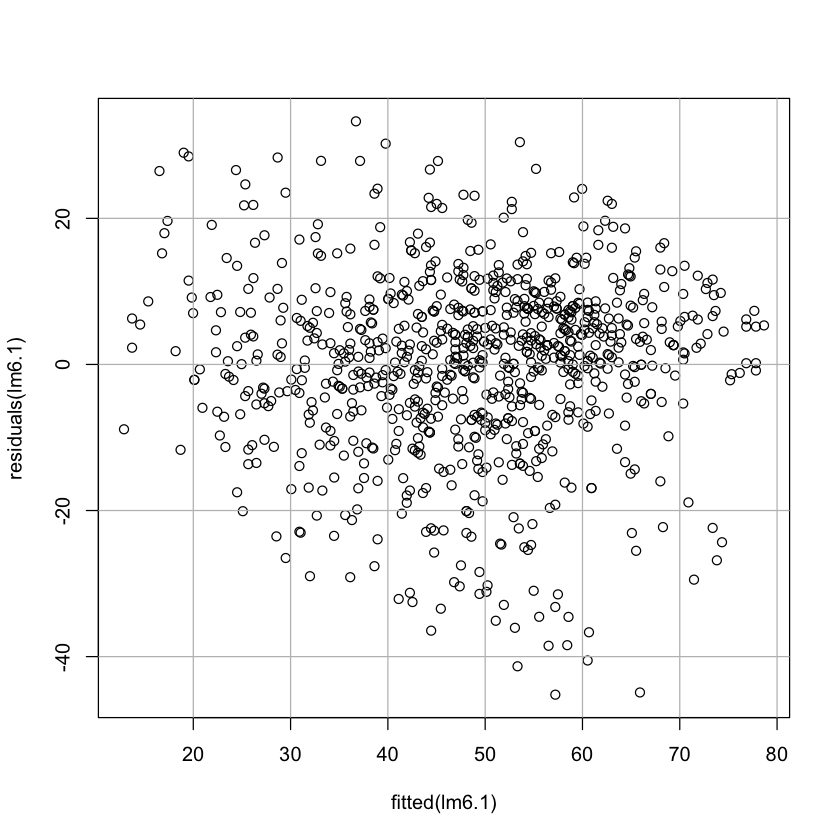

In [33]:
# Scatterplot of raw residuals versus fitted values
par(bg = "white") # Sets the background color to white
plot(fitted(lm6.1), residuals(lm6.1)) # residuals() can be replaced by resid() or lm6.1$residuals      
abline(h = seq(-40, 40, by = 20), col = "grey")
abline(v = seq( 10, 80, by = 10), col = "grey")

# Comments: 
# The (vertical) width of the scatterplot clearly increases with increasing fitted values, 
# which implies a non-constant residual variance.

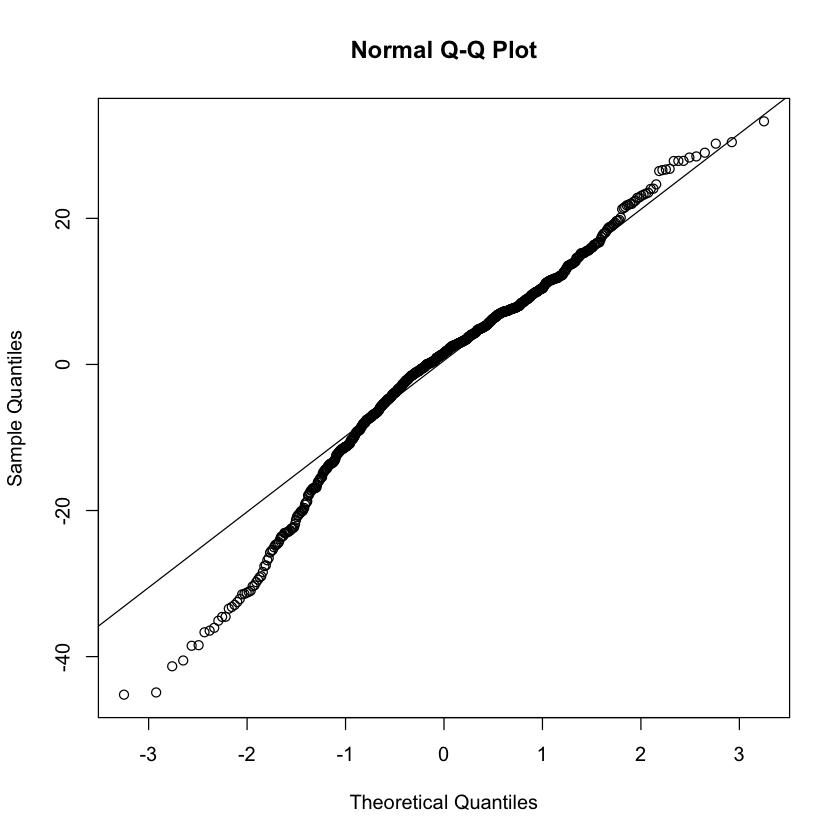

In [34]:
par(bg = "white") # Sets the background color to white
qqnorm(residuals(lm6.1))
qqline(residuals(lm6.1)) 

# Comments: the shape of the plot clearly deviates from a straight line. 
# Especially on the left tail.
# This may be an indication of a problem with the normality of the residuals. 
# However, it may also be the effect of ignored heteroscedasticity
# and/or correlation of the visual acuity measurements.

In [ ]:
shapiro.test(lm6.1$residuals) # problem confirmed by shapiro.test
#If the p-value is small (typically < 0.05), it suggests the residuals are NOT normally distributed.


	Shapiro-Wilk normality test

data:  lm6.1$residuals
W = 0.96922, p-value = 1.453e-12


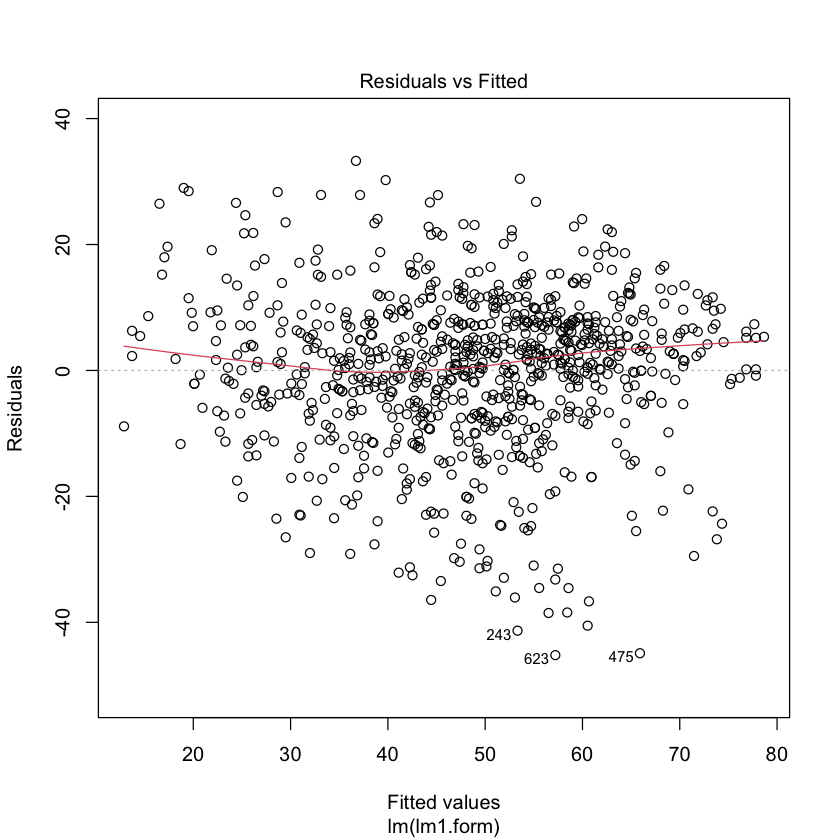

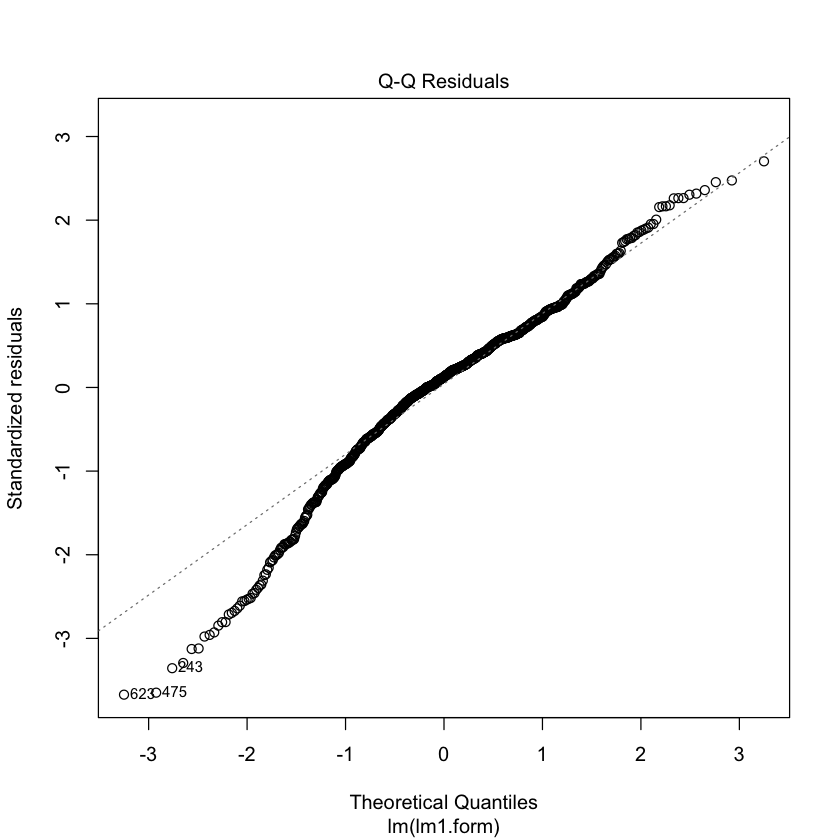

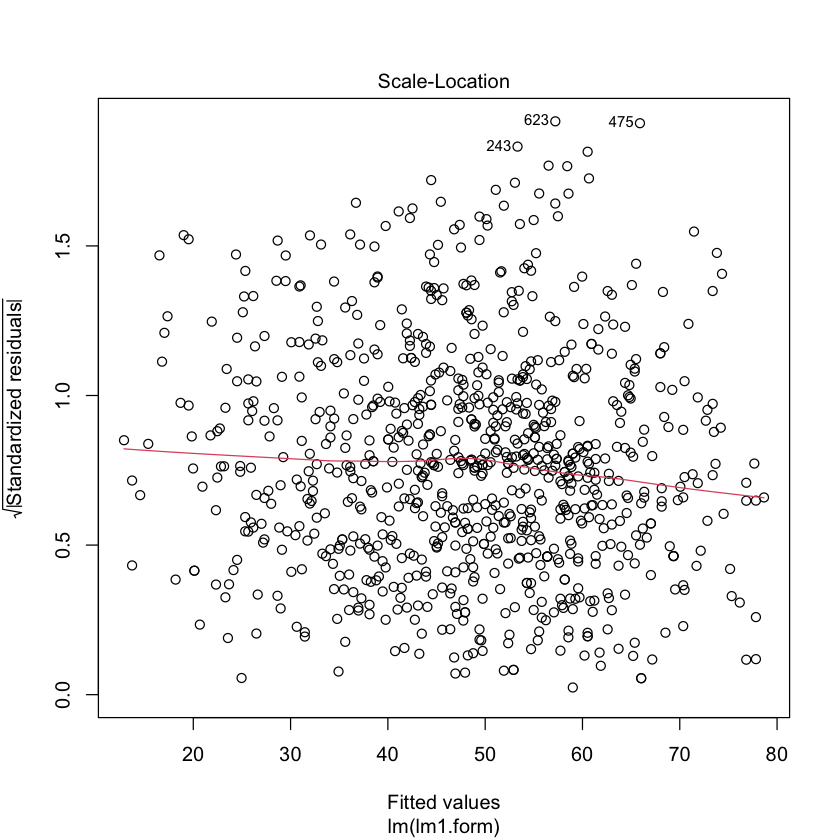

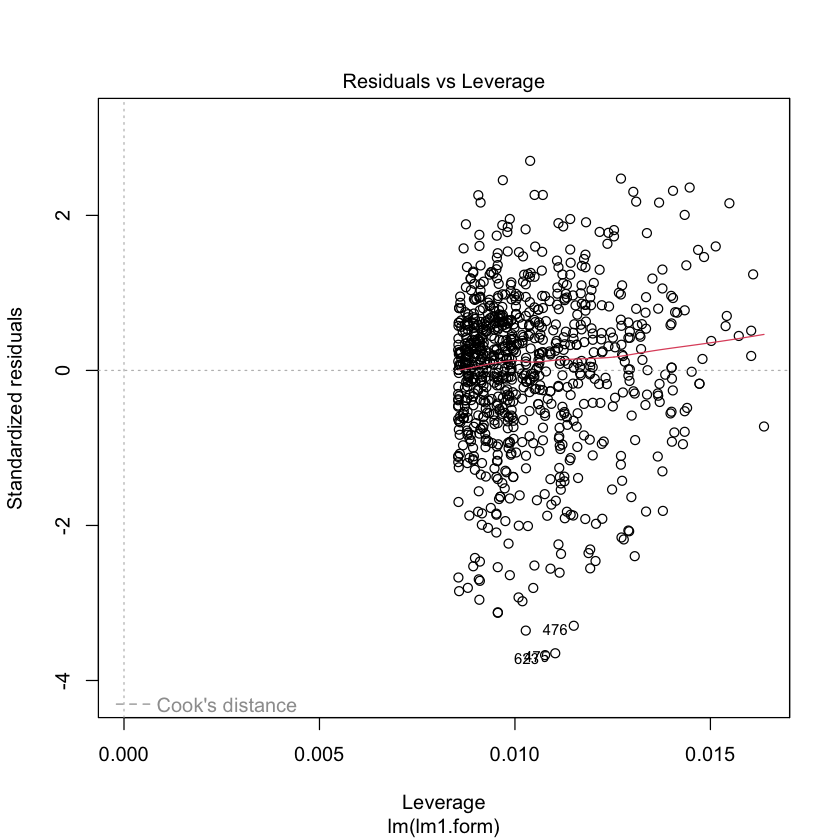

In [58]:
# Automatic diagnostic plots (graphically)
#x11()
par(bg = "white") # Sets the background color to white
par(mfrow = c(1,1))
plot(lm6.1)
# Third plot: checks whether residuals are spread equally along the ranges of predictors. 
# --> assumption of equal variance (homoscedasticity) is checked

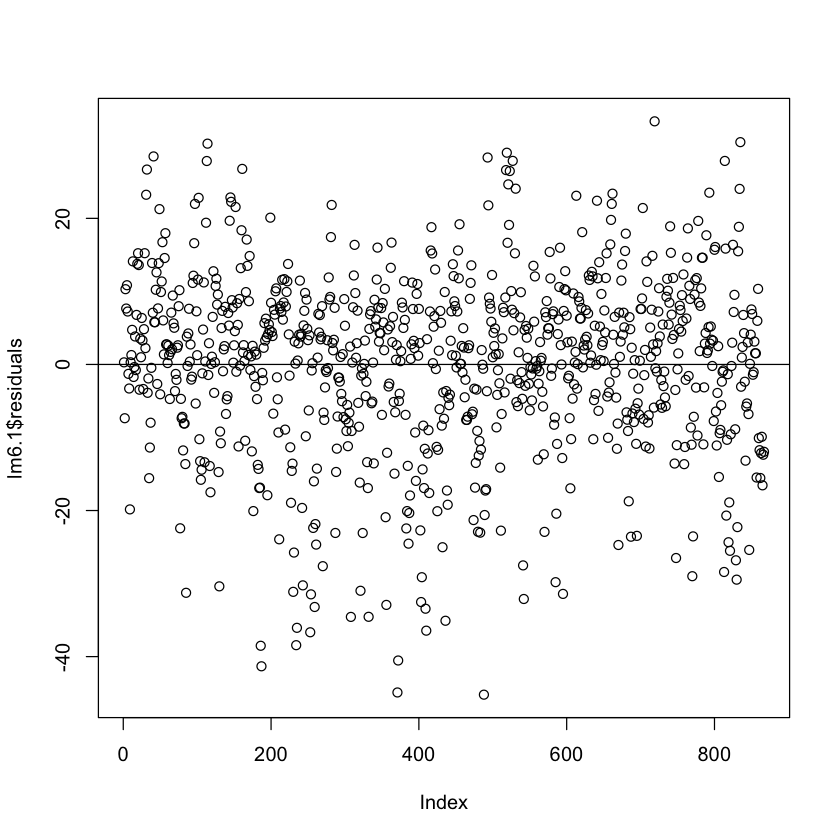

In [37]:
# Residual analysis
par(bg = "white") # Sets the background color to white
plot(lm6.1$residuals) 
abline(h=0)
# homoscedastic?
# .. We remember that observations are not independent 
#    and that the variance of the visual measurements increases in time

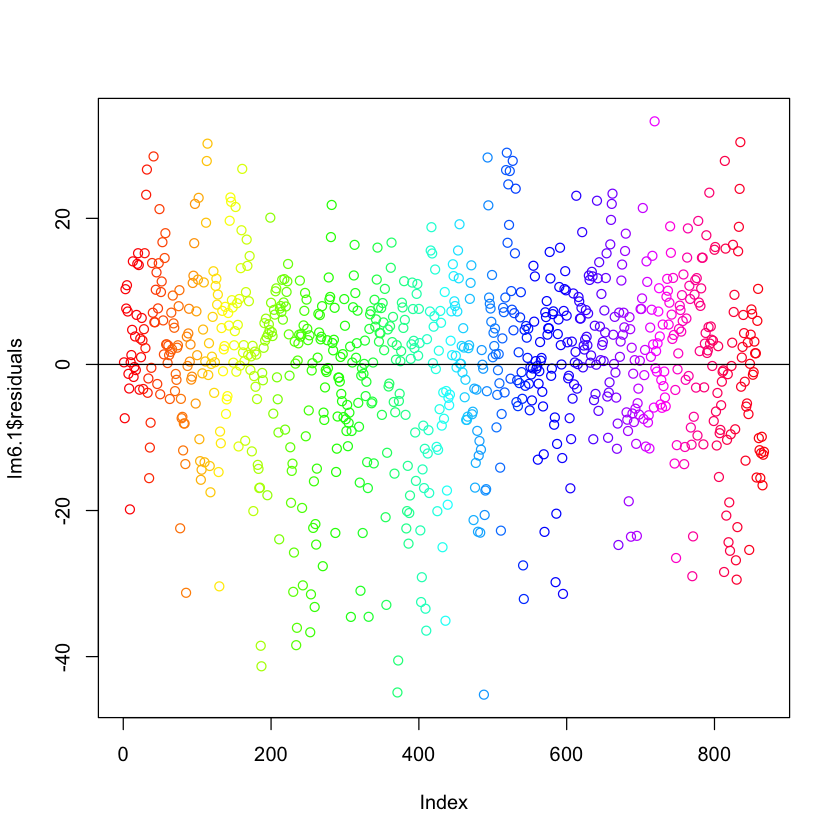

In [38]:
# let's color the residuals relative to different patients
par(bg = "white") # Sets the background color to white
colori = rainbow(length(unique(armd$subject)))
num_sub = table(armd$subject)
colori2 = rep(colori, num_sub)
plot(lm6.1$residuals, col=colori2) 
abline(h=0)   
# --> different variability between patients

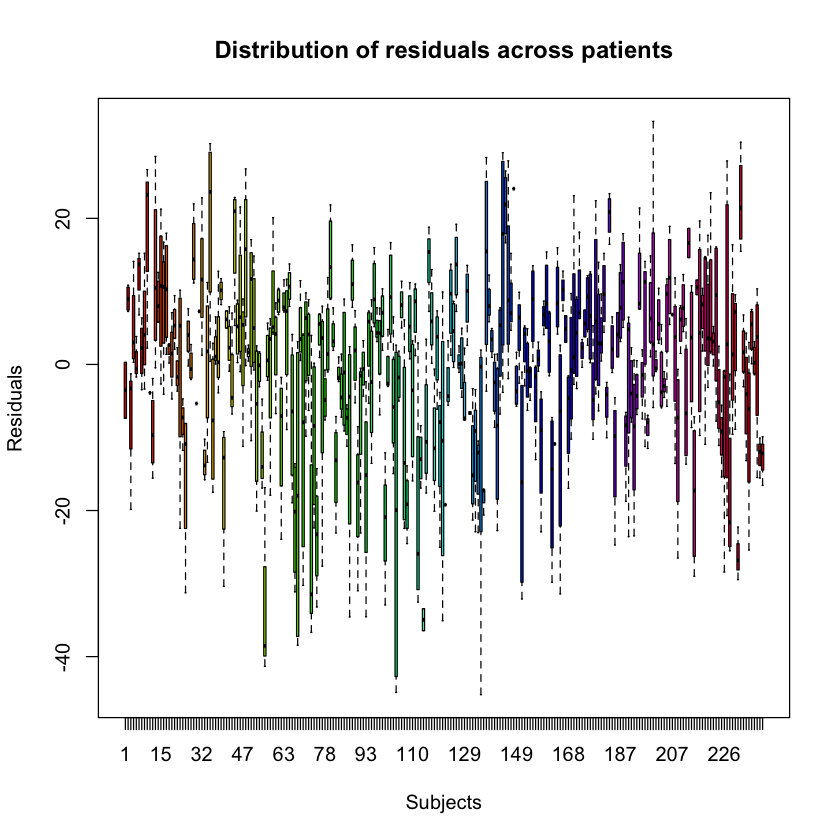

In [39]:
par(bg = "white") # Sets the background color to white
boxplot(lm6.1$residuals ~ armd$subject, col=colori,
        xlab='Subjects', ylab='Residuals', 
        main ='Distribution of residuals across patients')  # --> informative!

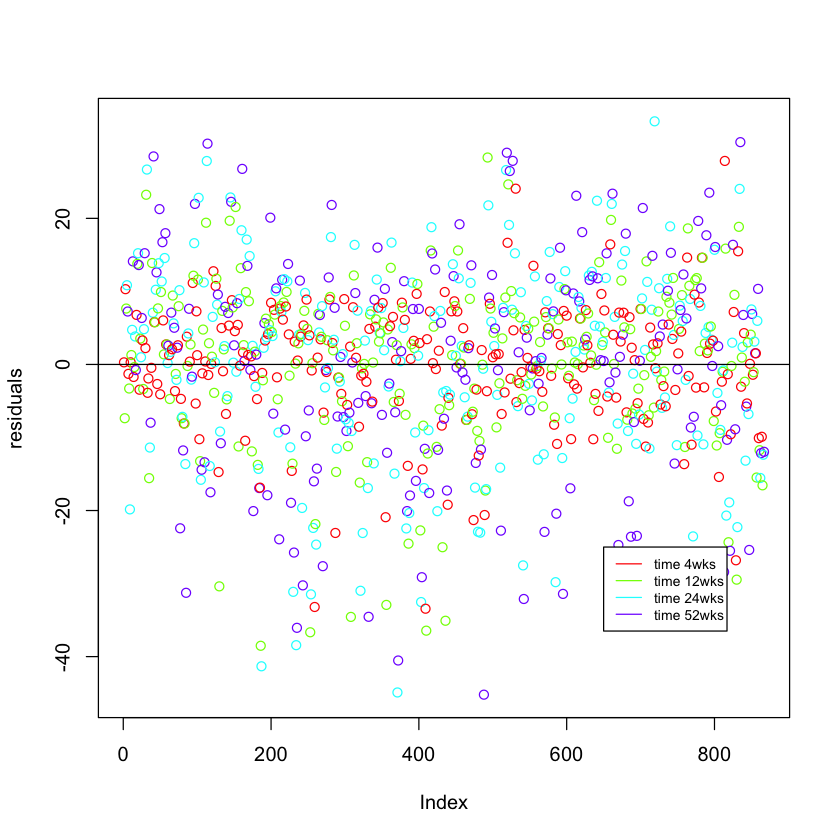

In [40]:
# let's color the residuals relative to different time instants
set.seed(1)
par(bg = "white") # Sets the background color to white
colori =rainbow(4)
colori2 = colori[armd$tp] # associate to each one of the 4 time instants a color
plot(lm6.1$residuals, col=colori2, ylab='residuals')
abline(h=0)
legend(650, -25, legend=c("time 4wks", "time 12wks", "time 24wks", "time 52wks"),
       col=colori, lty=1, cex=0.7) # --> not very informative!

# Comments: we observe that red points are the closest to 0, purple ones are the furthest
# We expect the residuals to be heterogeneous across different time instants observations


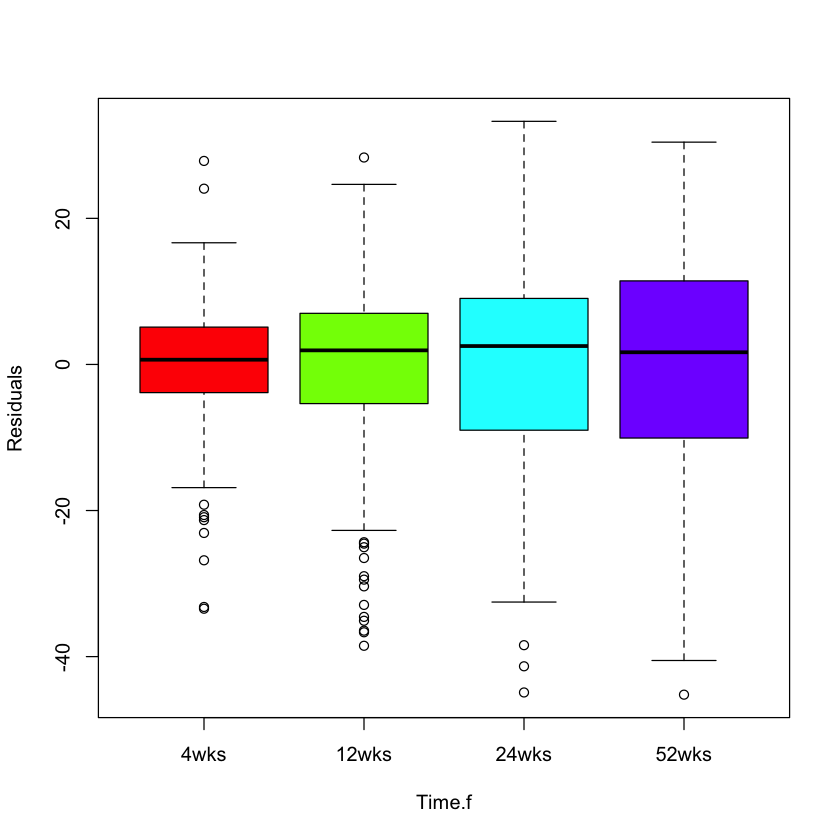

In [ ]:
par(bg = "white")  
boxplot(lm6.1$residuals ~ armd$time.f, col=colori,
        xlab='Time.f', ylab='Residuals') # --> informative
# -> the variance of the observations increases in time

# The model does not take into account the correlation 
# between the visual acuity observations obtained from the same subject. 
# It also does not take into account the heterogeneous variability
# present at different time points. 
# Thus, it should not be used as a basis for inference.

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
      AIC      BIC   logLik
  6821.62 6869.166 -3400.81

Coefficients:
                              Value Std.Error   t-value p-value
visual0                    0.830372 0.0284243 29.213483  0.0000
time.f4wks                 8.075314 1.9434077  4.155234  0.0000
time.f12wks                7.080657 1.9406595  3.648583  0.0003
time.f24wks                3.630216 1.9531644  1.858633  0.0634
time.f52wks               -1.746430 1.9895174 -0.877816  0.3803
time.f4wks:treat.fActive  -2.352776 1.6289409 -1.444359  0.1490
time.f12wks:treat.fActive -3.708522 1.6437809 -2.256093  0.0243
time.f24wks:treat.fActive -3.449153 1.6939909 -2.036111  0.0420
time.f52wks:treat.fActive -4.473453 1.7781123 -2.515844  0.0121

 Correlation: 
                          visul0 tm.f4w tm.f12 tm.f24 tm.f52 t.4:.A t.12:.
time.f4wks                -0.808                                          
time.f12wks               -0.808  0.653             

Approximate 95% confidence intervals

 Coefficients:
                               lower       est.      upper
visual0                    0.7745832  0.8303725  0.8861617
time.f4wks                 4.2609239  8.0753138 11.8897036
time.f12wks                3.2716615  7.0806575 10.8896534
time.f24wks               -0.2033236  3.6302160  7.4637556
time.f52wks               -5.6513208 -1.7464298  2.1584611
time.f4wks:treat.fActive  -5.5499518 -2.3527761  0.8443996
time.f12wks:treat.fActive -6.9348245 -3.7085220 -0.4822195
time.f24wks:treat.fActive -6.7740045 -3.4491532 -0.1243018
time.f52wks:treat.fActive -7.9634126 -4.4734534 -0.9834943

 Residual standard error:
   lower     est.    upper 
11.81764 12.37649 12.99124 

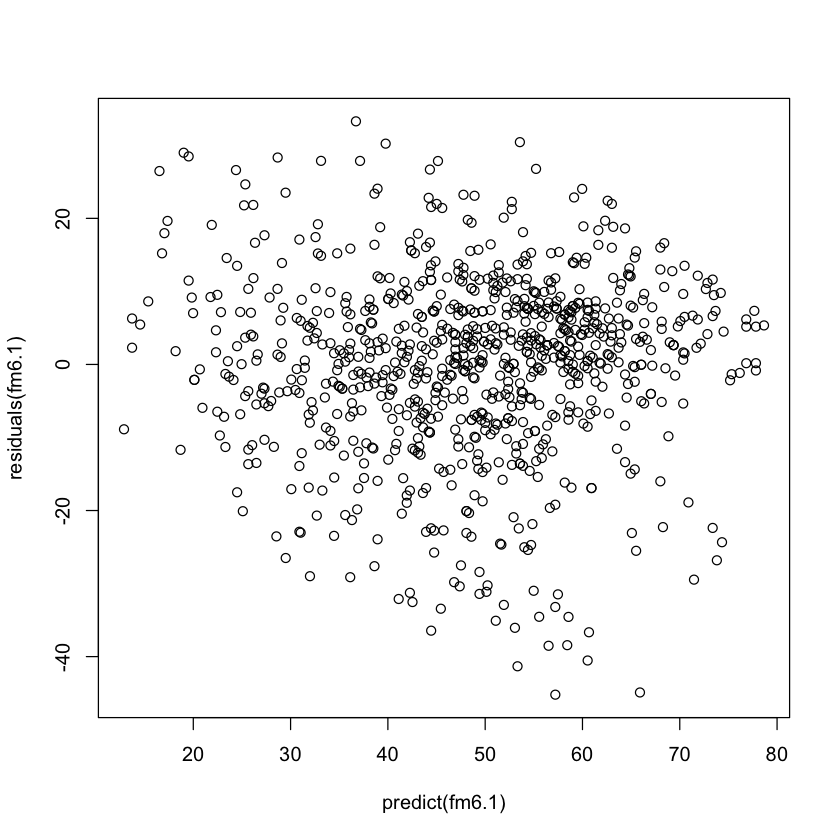

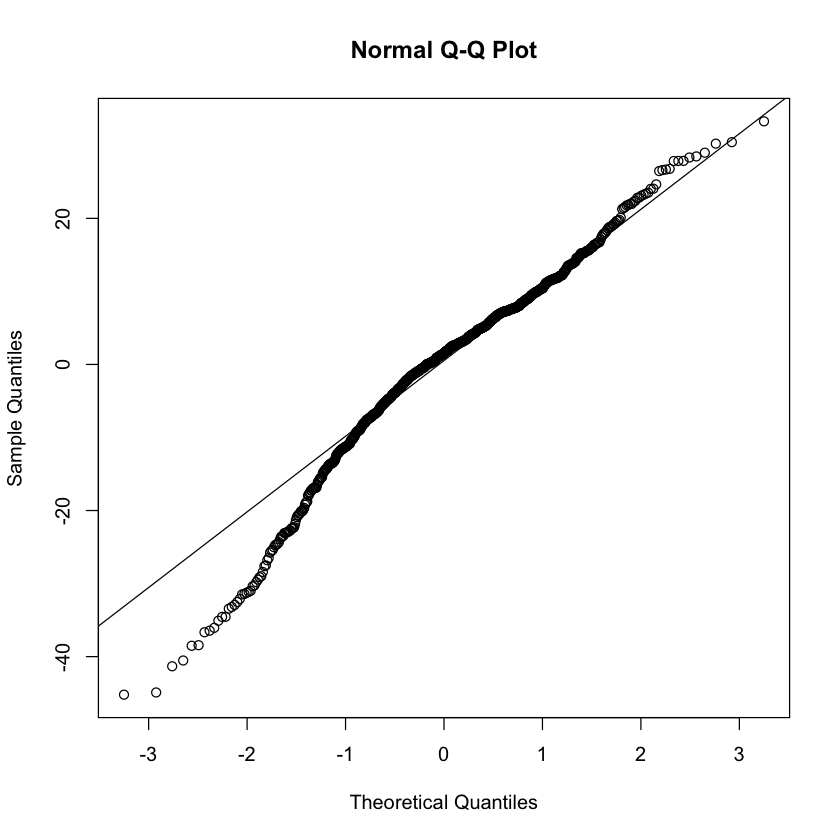

In [42]:
#____________________________________________________#
##### The model can be also fitted through gls() #####
#____________________________________________________#
require(nlme)              # Attach nlme package
fm6.1 <- gls(lm1.form, data = armd)
summary(fm6.1)
intervals(fm6.1)           # 95% CI for beta, sigmas


par(bg = "white") # Sets the background color to white
plot(predict(fm6.1), residuals(fm6.1))   # Same as before

par(bg = "white") # Sets the background color to white
qqnorm(residuals(fm6.1))                 # Same as before
qqline(residuals(fm6.1))

# see 1_3_lm()_VS_glm()_Recap.R
# for the main differences between the two functions